<a href="https://colab.research.google.com/github/achalgarg14/session_7/blob/main/Session_7_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.optim.lr_scheduler import StepLR,OneCycleLR
from tqdm import tqdm
import torch.nn as nn
import numpy as  np

In [ ]:
!pip install torchsummary
from torchsummary import summary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install -U albumentations
import albumentations as A
from albumentations.pytorch import ToTensorV2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Linking with Drive for saving the model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing from Github

In [ ]:
!git clone https://github.com/achalgarg14/eva8_main_folder

Cloning into 'eva8_main_folder'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 15 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (15/15), 8.50 KiB | 395.00 KiB/s, done.


## Importing ResNet18

In [ ]:
from eva8_main_folder.models import resnet
from eva8_main_folder.models.resnet import ResNet18

## Importing Main and Utils

In [ ]:
from eva8_main_folder import main, utils
from eva8_main_folder.utils import *    
from eva8_main_folder.main import *

# Assigning Device

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [ ]:
view_model = ResNet18().to(device)
view_model_summary(view_model, device)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


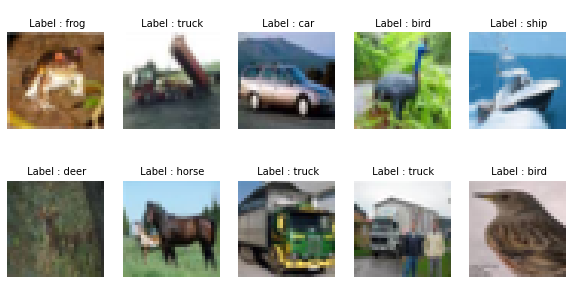

In [ ]:
model = ResNet18().to(device)
trainset_mod, trainloader_mod, testset_mod, testloader_mod = process_dataset() 

In [ ]:
model_tr, train_loss, test_loss, train_a, test_a, wrong_pre = train_test_model(model, trainloader_mod, testloader_mod, 20, 0.01, 'SGD', 'StepLR', lambda_l1 = 0, target_acc=90, max_epoch=5, device=device, folder = 'EVA8/Session_7/')

optimizer defined is SGD
EPOCH: 0


Loss=0.266431599855423 Batch_id=390 Accuracy=94.50: 100%|██████████| 391/391 [00:47<00:00,  8.23it/s]



Test set: Average loss: -14.8667, Accuracy: 8626/10000 (86.26%)

EPOCH: 1


Loss=0.0983193963766098 Batch_id=390 Accuracy=94.89: 100%|██████████| 391/391 [00:45<00:00,  8.53it/s]



Test set: Average loss: -14.9973, Accuracy: 8439/10000 (84.39%)

EPOCH: 2


Loss=0.07149975001811981 Batch_id=390 Accuracy=94.99: 100%|██████████| 391/391 [00:45<00:00,  8.51it/s]



Test set: Average loss: -15.4361, Accuracy: 8703/10000 (87.03%)

EPOCH: 3


Loss=0.08388206362724304 Batch_id=390 Accuracy=95.42: 100%|██████████| 391/391 [00:45<00:00,  8.56it/s]



Test set: Average loss: -14.8994, Accuracy: 8702/10000 (87.02%)

EPOCH: 4


Loss=0.1856333315372467 Batch_id=390 Accuracy=95.42: 100%|██████████| 391/391 [00:45<00:00,  8.54it/s]



Test set: Average loss: -16.0097, Accuracy: 8696/10000 (86.96%)

EPOCH: 5


Loss=0.09859255701303482 Batch_id=390 Accuracy=95.65: 100%|██████████| 391/391 [00:45<00:00,  8.57it/s]



Test set: Average loss: -15.8323, Accuracy: 8648/10000 (86.48%)

EPOCH: 6


Loss=0.1313171684741974 Batch_id=390 Accuracy=95.70: 100%|██████████| 391/391 [00:45<00:00,  8.64it/s]



Test set: Average loss: -15.5854, Accuracy: 8693/10000 (86.93%)

EPOCH: 7


Loss=0.11799752712249756 Batch_id=390 Accuracy=96.11: 100%|██████████| 391/391 [00:45<00:00,  8.56it/s]



Test set: Average loss: -15.9165, Accuracy: 8706/10000 (87.06%)

EPOCH: 8


Loss=0.08355491608381271 Batch_id=390 Accuracy=96.18: 100%|██████████| 391/391 [00:45<00:00,  8.52it/s]



Test set: Average loss: -15.6735, Accuracy: 8692/10000 (86.92%)

EPOCH: 9


Loss=0.1536886990070343 Batch_id=390 Accuracy=96.37: 100%|██████████| 391/391 [00:45<00:00,  8.57it/s]



Test set: Average loss: -16.1305, Accuracy: 8710/10000 (87.10%)

EPOCH: 10


Loss=0.11127837747335434 Batch_id=390 Accuracy=96.29: 100%|██████████| 391/391 [00:45<00:00,  8.55it/s]



Test set: Average loss: -16.1639, Accuracy: 8749/10000 (87.49%)

EPOCH: 11


Loss=0.11332162469625473 Batch_id=390 Accuracy=96.51: 100%|██████████| 391/391 [00:45<00:00,  8.57it/s]



Test set: Average loss: -16.6755, Accuracy: 8627/10000 (86.27%)

EPOCH: 12


Loss=0.06761337071657181 Batch_id=390 Accuracy=96.68: 100%|██████████| 391/391 [00:45<00:00,  8.54it/s]



Test set: Average loss: -17.5200, Accuracy: 8683/10000 (86.83%)

EPOCH: 13


Loss=0.150116965174675 Batch_id=390 Accuracy=96.84: 100%|██████████| 391/391 [00:45<00:00,  8.53it/s]



Test set: Average loss: -16.4632, Accuracy: 8698/10000 (86.98%)

EPOCH: 14


Loss=0.06109755486249924 Batch_id=390 Accuracy=96.99: 100%|██████████| 391/391 [00:45<00:00,  8.55it/s]



Test set: Average loss: -17.1731, Accuracy: 8660/10000 (86.60%)

EPOCH: 15


Loss=0.0491916760802269 Batch_id=390 Accuracy=96.94: 100%|██████████| 391/391 [00:47<00:00,  8.17it/s]



Test set: Average loss: -16.0658, Accuracy: 8738/10000 (87.38%)

EPOCH: 16


Loss=0.051506876945495605 Batch_id=390 Accuracy=97.07: 100%|██████████| 391/391 [00:46<00:00,  8.34it/s]



Test set: Average loss: -17.7096, Accuracy: 8702/10000 (87.02%)

EPOCH: 17


Loss=0.019174788147211075 Batch_id=390 Accuracy=97.25: 100%|██████████| 391/391 [00:46<00:00,  8.46it/s]



Test set: Average loss: -17.5193, Accuracy: 8808/10000 (88.08%)

EPOCH: 18


Loss=0.046395156532526016 Batch_id=390 Accuracy=97.24: 100%|██████████| 391/391 [00:45<00:00,  8.53it/s]



Test set: Average loss: -16.7914, Accuracy: 8788/10000 (87.88%)

EPOCH: 19


Loss=0.08161385357379913 Batch_id=390 Accuracy=97.35: 100%|██████████| 391/391 [00:46<00:00,  8.50it/s]



Test set: Average loss: -17.5208, Accuracy: 8782/10000 (87.82%)

Saved Model weights in file: /content/drive/MyDrive/EVA8/Session_7/Model_final_acc_87.82.pth
Total Number of incorrectly predicted images by model is 1218


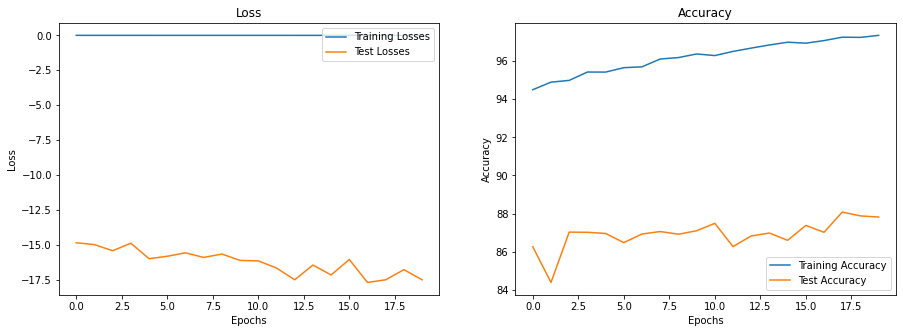

In [ ]:
plot_acc_loss(train_a,train_loss,test_a,test_loss)

Files already downloaded and verified
Files already downloaded and verified


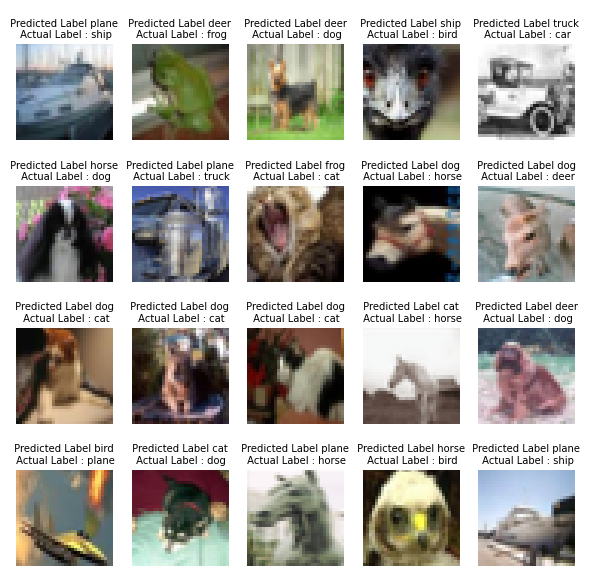

In [ ]:
display_incorrect_images(wrong_pre)

In [ ]:
target_layers = ["layer1", "layer2","layer3", "layer4"]
torch.autograd.set_detect_anomaly(True)

In [ ]:
gradcam_output, probs, predicted_classes = generate_gradcam(wrong_pre[:10], model_tr, target_layers, device)

torch.Size([10, 10])
Generating Grad-CAM @layer1
Generating Grad-CAM @layer2
Generating Grad-CAM @layer3
Generating Grad-CAM @layer4


/usr/local/lib/python3.8/dist-packages/torch/nn/modules/module.py:1117: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


Files already downloaded and verified
Files already downloaded and verified


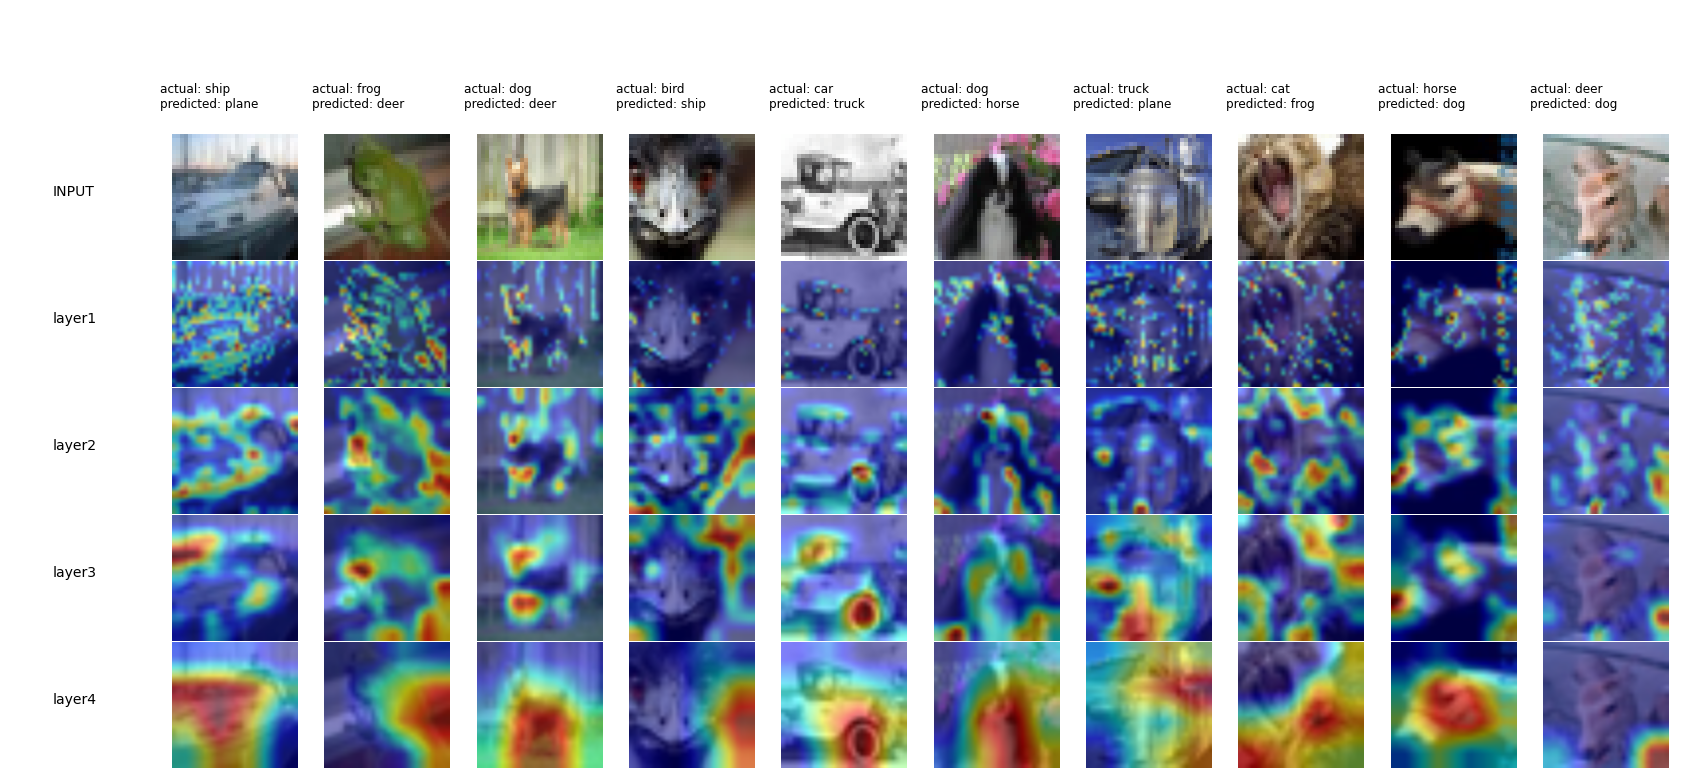

In [ ]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
plot_gradcam(gradcam_output, target_layers, classes, (3,32,32), predicted_classes, wrong_pre[:10])